## Forecasting FX Returns

## Description:
### In this project, I am going to back-test strategies of forecasting FX returns on a rolling basis. 
### I'll back-test two strategies, one based on Model Selection Method A, and the other based on Method B.

### 1. Model Selection Method A (In-Sample):
### (1) At the time point t, calibrate/estimate the two models based on the past 24 monthly return observations (current observation at t included).
### (2) Forecast the next period return at time (t+1) using the selected model. 
### 2. Model Selection Method B (Out-Sample):
### (1) At the time point t, for each model, out-of-samplely forecast the returns for the past 12 months. For each time point from t-11 to t, say for t-k where k=0,…,11, I'll estimate each model using the past 24 observations, i.e., observations at (t-k-24,…,t-k-1), then based on the estimated model to forecast returns at t-k. Now, for AR(1) model, I have forecasts for t-11, t-10,…,t, the MSE can be calculated as the mean of (forecast - true return)^2. For MA(1) model, I have another vector of 12 forecasts, with corresponded 12 true returns, and I can calculate MSE. The model with lower MSE would be selected.
### (2)  Then, I need to calibrate that model using the past 24 observations adn forecast the next period return at time (t+1).
### 3. The portfolio (w1*,…,w7*)'s return at time t+1 will be calculated as (sign(r1) x w1* x r1_new+…+ sign(r7) x w1* x r7_new)


In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
fx = pd.read_excel('FX.xlsx', sheet_name = 'FX_Prices', header = 1, index_col = [0], parse_dates=[0])
fx = fx[['EURUSD', 'GBPUSD','JPYUSD','AUDUSD','CADUSD','NOKUSD','CHFUSD']] 
fx.sort_index(inplace = True)
fx.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1994-04-29,1.1840,1.5185,0.009833,0.7155,0.7231,0.1395,0.7125
1994-05-31,1.1909,1.5113,0.009544,0.7371,0.7225,0.1400,0.7130
1994-06-30,1.2238,1.5443,0.010158,0.7285,0.7224,0.1444,0.7499
1994-07-29,1.2261,1.5440,0.009985,0.7395,0.7211,0.1448,0.7463
1994-08-31,1.2341,1.5340,0.009995,0.7429,0.7310,0.1442,0.7508


In [3]:
fx_ret = fx.pct_change()
fx_ret.dropna(inplace = True)
fx_ret.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1994-05-31,0.005828,-0.004742,-0.029391,0.030189,-0.000830,0.003584,0.000702
1994-06-30,0.027626,0.021836,0.064334,-0.011667,-0.000138,0.031429,0.051753
1994-07-29,0.001879,-0.000194,-0.017031,0.015100,-0.001800,0.002770,-0.004801
1994-08-31,0.006525,-0.006477,0.001002,0.004598,0.013729,-0.004144,0.006030
1994-09-30,0.017827,0.028357,0.009105,-0.003634,0.018605,0.022191,0.034497


In [4]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
def AR_model(data):
    model = ARIMA(data, order=(1,0,0))
    m_fit = model.fit(disp=0)
    return m_fit

In [6]:
def MA_model(data):
    model = ARIMA(data, order=(0,0,1))
    m_fit = model.fit(disp=0)
    return m_fit

## MODEL SELECTION METHOD A (In-Sample)

### AR(1)

In [7]:
warnings.filterwarnings("ignore")
ar_aic = pd.DataFrame(index = fx_ret.index, columns = fx_ret.columns)
for i in range(len(fx_ret.columns)):
    for t in range(24,len(fx_ret)):
        model = AR_model(fx_ret.iloc[t-24:t,i].values)
        ar_aic.iloc[t,i] = model.aic        

In [8]:
ar_aic.dropna(inplace = True)
ar_aic.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1996-05-31,-105.823,-117.522,-84.0238,-121.262,-141.857,-104.935,-87.8583
1996-06-28,-105.894,-115.72,-84.931,-124.298,-141.604,-104.944,-87.7114
1996-07-31,-107.037,-116.73,-89.1644,-124.097,-141.502,-106.325,-89.5711
1996-08-30,-105.868,-116.736,-88.322,-123.544,-140.913,-105.757,-88.0226
1996-09-30,-105.945,-116.664,-87.6899,-121.137,-142.106,-105.707,-88.0108


### MA(1)

In [9]:
warnings.filterwarnings("ignore")
ma_aic = pd.DataFrame(index = fx_ret.index, columns = fx_ret.columns)
for i in range(len(fx_ret.columns)):
    for t in range(24,len(fx_ret)):
        model = MA_model(fx_ret.iloc[t-24:t,i].values)
        ma_aic.iloc[t,i] = model.aic        

In [10]:
ma_aic.dropna(inplace = True)
ma_aic.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1996-05-31,-106.12,-118.804,-83.8011,-121.805,-141.863,-105.285,-87.9695
1996-06-28,-106.19,-117.238,-84.5862,-125.736,-141.614,-105.343,-87.7768
1996-07-31,-107.409,-118.514,-88.7305,-125.373,-141.511,-106.728,-89.611
1996-08-30,-106.24,-118.396,-88.1453,-125.405,-140.914,-106.159,-88.0793
1996-09-30,-106.374,-118.53,-87.5312,-123.017,-142.107,-106.106,-88.0868


### method1 prediction 

In [11]:
warnings.filterwarnings("ignore")
prediction = pd.DataFrame(index = fx_ret.index, columns = fx_ret.columns)
for i in range(len(fx_ret.columns)):
    for t in range(24,len(fx_ret)):
        if ar_aic.iloc[t-24,i] <= ma_aic.iloc[t-24,i]:
            model1 = AR_model(fx_ret.iloc[t-24:t,i].values)
            y_pred1 = model1.predict(start=24,end=24)[0]
            prediction.iloc[t,i] = y_pred1
        else:
            model2 = MA_model(fx_ret.iloc[t-24:t,i].values)
            y_pred2 = model2.predict(start=24,end=24)[0]
            prediction.iloc[t,i] = y_pred2 

In [12]:
prediction.dropna(inplace = True)
prediction_show = prediction.loc["2000-01-31":]
prediction_show.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2000-01-31,-0.00313101,-0.00185835,0.0141235,-0.000595459,-0.00234409,0.0119386,-0.00319205
2000-02-29,-0.00613727,-0.000818724,0.018341,-0.000381987,0.000339582,0.0125225,-0.00758237
2000-03-31,-0.00462829,0.00906491,0.0123766,-0.00218397,-0.000578587,0.00204998,-0.00510896
2000-04-28,-0.00450106,-0.0016301,-0.000457502,-0.00236786,-0.000798027,-0.00077601,-0.00277411
2000-05-31,-0.0114371,0.00782404,0.0270022,-0.00203333,0.000620174,0.00716687,-0.00839787


In [13]:
MSE_method1 = pd.DataFrame(index = prediction.columns, columns = {"error_method1"})
for i in fx_ret.columns:
    MSE_method1.loc[i] = ((fx_ret[i].loc["2000-01-31":]-prediction_show[i])**2).mean()
MSE_method1

,error_method1
EURUSD,0.00094724
GBPUSD,0.000678809
JPYUSD,0.000861716
AUDUSD,0.0017497
CADUSD,0.000741142
NOKUSD,0.00120313
CHFUSD,0.000987719


## MODEL SELECTION METHOD B (Out-Sample)

### AR(1)

In [14]:
warnings.filterwarnings("ignore")
ar_pred = pd.DataFrame(index = fx_ret.index, columns = fx_ret.columns)
for i in range(len(fx_ret.columns)):
    for t in range(12+24,len(fx_ret)):
        model = AR_model(fx_ret.iloc[t-12-24:t-12,i].values)
        y_pred = model.predict(start=24,end=24)[0]
        ar_pred.iloc[t-12,i] = y_pred        

In [15]:
ar_pred.dropna(inplace = True)
ar_pred.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1996-05-31,0.00981062,0.00359251,0.00462152,0.00481675,0.000559307,0.00787998,0.0108551
1996-06-28,0.00244239,-0.00800335,-0.00885945,0.00669316,0.000104702,0.00305493,0.00597898
1996-07-31,0.00175711,0.000247748,-0.00833311,-0.00170791,0.000887791,0.00332741,0.00358571
1996-08-30,-0.00166255,3.7102e-05,0.00886647,-0.00561872,-0.000151833,0.000873695,0.00215579
1996-09-30,0.0038442,-0.00052836,-0.0083194,0.00790167,-0.00017293,0.00505827,0.00547015


### MA(1)

In [16]:
warnings.filterwarnings("ignore")
ma_pred = pd.DataFrame(index = fx_ret.index, columns = fx_ret.columns)
for i in range(len(fx_ret.columns)):
    for t in range(12+24,len(fx_ret)):
        model = MA_model(fx_ret.iloc[t-12-24:t-12,i].values)
        y_pred = model.predict(start=24,end=24)[0]
        ma_pred.iloc[t-12,i] = y_pred        

In [17]:
ma_pred.dropna(inplace = True)
ma_pred.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1996-05-31,0.0119662,0.00558522,0.00530657,0.00363868,0.000525449,0.0106812,0.0130162
1996-06-28,0.00435881,-0.00937406,-0.0105924,0.00889622,9.83743e-05,0.00399781,0.00682489
1996-07-31,0.00194346,-0.00525392,-0.00391936,-0.0068393,0.000924546,0.0035441,0.00388532
1996-08-30,-0.00351697,-0.00334333,0.00867873,-0.00334349,-0.000165234,-0.00064823,0.000795031
1996-09-30,0.00215927,-0.00471057,-0.0119141,0.0166277,-0.000167605,0.00472014,0.00510031


### method2 prediction

In [18]:
warnings.filterwarnings("ignore")
prediction2 = pd.DataFrame(index = fx_ret.index, columns = fx_ret.columns)
for i in range(len(fx_ret.columns)):
    for t in range(12+24,len(fx_ret)):
        ar_MSE = ((fx_ret.iloc[t-12:t,i]-ar_pred.iloc[t-12-24:t-24,i])**2).mean()
        ma_MSE = ((fx_ret.iloc[t-12:t,i]-ma_pred.iloc[t-12-24:t-24,i])**2).mean()
        if ar_MSE <= ma_MSE:
            model1 = AR_model(fx_ret.iloc[t-24:t,i].values)
            y_pred1 = model1.predict(start=24,end=24)[0]
            prediction2.iloc[t,i] = y_pred1
        else:
            model2 = MA_model(fx_ret.iloc[t-24:t,i].values)
            y_pred2 = model2.predict(start=24,end=24)[0]
            prediction2.iloc[t,i] = y_pred2
            

In [19]:
prediction2.dropna(inplace = True)
prediction2_show = prediction2.loc["2000-01-31":]
prediction2_show.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2000-01-31,-0.00302188,-0.00538867,0.012898,-6.46885e-05,-0.00205746,-0.00612321,-0.00319205
2000-02-29,-0.00552888,-6.63384e-06,0.0146417,-0.00058288,0.000287085,0.00902723,-0.00758237
2000-03-31,-0.00442822,0.00683345,0.0106261,-0.00263065,-0.000589601,-0.00273595,-0.00510896
2000-04-28,-0.0043931,-0.00584057,0.00384876,-0.00269107,-0.000776871,-0.0027131,-0.00277411
2000-05-31,-0.0102417,0.00782404,0.0204166,-0.00256603,0.000267937,0.00716687,-0.00839787


In [20]:
MSE_method2 = pd.DataFrame(index = prediction2.columns, columns = {"error_method2"})
for i in fx_ret.columns:
    MSE_method2.loc[i] = ((fx_ret[i].loc["2000-01-31":]-prediction2_show[i])**2).mean()
MSE_method2

,error_method2
EURUSD,0.000920734
GBPUSD,0.000649719
JPYUSD,0.000844993
AUDUSD,0.00161885
CADUSD,0.000736261
NOKUSD,0.00113559
CHFUSD,0.000982732


## compare two methods

In [21]:
method_error = pd.concat([MSE_method1, MSE_method2], axis=1)
method_error

,error_method1,error_method2
EURUSD,0.00094724,0.000920734
GBPUSD,0.000678809,0.000649719
JPYUSD,0.000861716,0.000844993
AUDUSD,0.0017497,0.00161885
CADUSD,0.000741142,0.000736261
NOKUSD,0.00120313,0.00113559
CHFUSD,0.000987719,0.000982732


### Model Selection Method B Looks Better
### Therefore, using prediction from method2 into the following question

## Risk Parity

In [22]:
# transfer forecasts to return sign
pred = pd.DataFrame(index = prediction2.index, columns = prediction2.columns)
for i in range(len(pred.columns)):
    for j in range(len(pred)):
        if prediction2.iloc[j,i] >= 0:
            pred.iloc[j,i] = 1
        else:
            pred.iloc[j,i] = -1
pred.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1997-05-30,-1,1,-1,1,-1,1,-1
1997-06-30,-1,1,-1,1,-1,-1,-1
1997-07-31,-1,-1,-1,1,1,1,-1
1997-08-29,-1,1,-1,-1,-1,1,-1
1997-09-30,-1,1,-1,-1,-1,-1,-1


In [23]:
r = pred * fx_ret.loc["1997-05-30":]
r.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1997-05-30,-0.014332,0.009300,-0.092654,-0.026134,-0.015096,0.001425,-0.041845
1997-06-30,0.018317,0.016415,-0.015238,-0.008156,0.003029,0.029872,0.032527
1997-07-31,0.051177,0.014890,0.033570,-0.008223,0.002210,-0.038856,0.033475
1997-08-29,-0.019477,-0.015541,0.019798,0.020727,0.007304,0.019069,-0.013309
1997-09-30,-0.020116,0.000186,-0.003628,0.009832,-0.004720,-0.059880,-0.031045


In [24]:
num_ac=len(fx_ret.columns)
b_erc = np.ones([num_ac])
b_erc = b_erc/sum(b_erc)

In [25]:
import scipy

def obj_func(w,Sigma):
    obj_func = np.sqrt(np.dot(np.dot(w.T,Sigma),w))
    return obj_func
def opt_weight(Sigma):
    const=1
    w = np.ones([num_ac])/num_ac
    b_ = [(0.,1.) for i in range(num_ac)]    
    c_ = ({'type':'eq', 'fun': lambda w: sum(w)-1}, 
       {'type':'ineq', 'fun': lambda w: -np.dot(np.dot(w,b_erc),w) + const })  
    optimized = scipy.optimize.minimize(obj_func, w, Sigma, method='SLSQP', constraints=c_, bounds=b_) 
    w_rp = optimized.x
    return w_rp.round(5)

In [26]:
weight_rp = pd.DataFrame(index = prediction2.index, columns = prediction2.columns)
weight_updated = pd.DataFrame(index = prediction2.index, columns = prediction2.columns)
for t in range(60,len(prediction2)):
    Sigma1 = r.iloc[t-60:t].cov()
    w_rp = opt_weight(Sigma1)
    sigma_rp = np.sqrt(np.dot(np.dot(w_rp.T,Sigma1),w_rp))
    diag_w = np.zeros((7, 7), float)
    np.fill_diagonal(diag_w, w_rp)
    cr_for_rp = np.dot(np.dot(diag_w,Sigma1),w_rp)/sigma_rp
    pcr_for_rp=cr_for_rp/sigma_rp
    #risk_vec = np.sqrt(Sigma1.values.diagonal())
    w_vp = (0.05/sigma_rp) * w_rp
    weight_rp.iloc[t] = w_rp
    weight_updated.iloc[t] = w_vp

In [27]:
weight_rp.dropna(inplace = True)
weight_rp.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2002-05-31,0,0.25803,0.04208,0.00152,0.512,0.04325,0.14312
2002-06-28,0,0.23269,0.05008,0,0.50781,0.04848,0.16094
2002-07-31,0,0.23385,0.04947,0,0.50688,0.04937,0.16044
2002-08-30,0,0.25006,0.05362,0,0.47808,0.05291,0.16532
2002-09-30,0,0.25605,0.05333,0,0.47394,0.05102,0.16567


In [28]:
weight_updated.dropna(inplace = True)
weight_updated.head()

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2002-05-31,0,1.30763,0.213251,0.00770297,2.59468,0.21918,0.725295
2002-06-28,0,1.20096,0.258472,0,2.6209,0.250214,0.830642
2002-07-31,0,1.22088,0.258272,0,2.64631,0.25775,0.837622
2002-08-30,0,1.29302,0.277261,0,2.47208,0.27359,0.854846
2002-09-30,0,1.31569,0.274031,0,2.43529,0.262161,0.851278


## Portfolio Performance

In [29]:
port_updated = pd.DataFrame(index = weight_updated.index, columns = {"return"})
pred1 = pred.loc["2002-04-30":]
r_new = fx_ret.loc["2002-04-30":]
cal = [np.nan]*len(weight_updated.columns)
for t in range(len(weight_updated)):   
    for j in range(len(weight_updated.columns)):
        cal[j] = pred1.iloc[t,j] * weight_updated.iloc[t,j] * r_new.iloc[t,j]
        port_updated.iloc[t,0] = sum(cal)
port_updated.head()

,return
Dates,
2002-05-31,-0.0634669
2002-06-28,-0.0356194
2002-07-31,0.0056096
2002-08-30,0.0690243
2002-09-30,-0.0424589


In [30]:
port_updated.tail()

,return
Dates,
2018-11-30,0.0164394
2018-12-31,-0.0396968
2019-01-31,0.0705635
2019-02-28,0.0275811
2019-03-29,-0.0339902


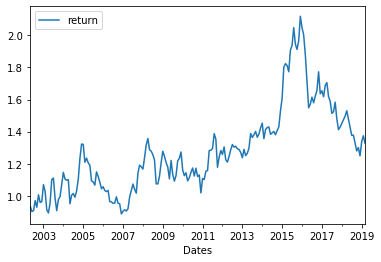

In [35]:
import matplotlib.pyplot as plt
cum_ret = (1 + port_updated).cumprod()
cum_ret.plot()

In [32]:
# annual return
ann_ret = port_updated.mean()*12
ann_ret

return    0.031837
dtype: float64

In [33]:
# annual volatility
std_ret = port_updated.std() * np.sqrt(12)
std_ret

return    0.173948
dtype: float64

In [34]:
# sharp ratio
sharp = ann_ret/std_ret
sharp

return    0.183024
dtype: float64